In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Cleaned_set1.csv")

In [5]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range(in_£),Model Price(in_£)
0,Tesla,Model Y Long Range AWD,Discontinued,(February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189.0,51990
1,Tesla,Model 3 Long Range AWD,Discontinued,(February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649.0,170.0,50990
2,Kia,EV3 Long Range,Available,to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485.0,129.0,35995
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682.0,145.0,39990
4,Tesla,Model Y RWD (Juniper),Available,to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971.0,191.0,44990


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    int64  
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  746 non-null    float64
 11  Price_Per_Range(in_£)  746 non-null    float64
 12  Model Price(in_£)      746 non-null    int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 75.9+ KB


In [9]:
df.groupby(by=['Brand','Model'])['Range(in_mile)'].mean()

Brand   Model                                  
Abarth  500e Convertible                           140.0
        500e Hatchback                             140.0
        500e Scorpionissima                        140.0
        600e Scorpionissima                        170.0
        600e Turismo                               170.0
                                                   ...  
Volvo   XC40 Recharge Twin Motor (MY24)            235.0
        XC40 Recharge Twin Pure Electric (MY22)    205.0
        XC40 Recharge Twin Pure Electric (MY23)    215.0
XPENG   G6 RWD Long Range                          300.0
        G6 RWD Standard Range                      230.0
Name: Range(in_mile), Length: 592, dtype: float64

## Pivot Table

In [12]:
piv = pd.pivot_table(df, values=['Range(in_mile)','Seating_Capacity','Boot Space(in_Litres)'], index=['Brand',"Availability",'Availability_Status']).sample(n=10)

In [14]:
piv

,,,Boot Space(in_Litres),Range(in_mile),Seating_Capacity
Brand,Availability,Availability_Status,,,
Jeep,Available,to order since June 2023,355.0,190.0,5.0
Vauxhall,Available,to order since November 2023,516.0,190.0,5.0
Polestar,Discontinued,(September 2021 - March 2022),440.0,215.0,5.0
Kia,Discontinued,(January 2022 - August 2024),500.0,250.0,5.0
Volvo,Discontinued,(April 2021 - December 2022),450.0,225.0,5.0
Volkswagen,Discontinued,(May 2021 - November 2023),543.0,255.0,5.0
Peugeot,Available,to order since September 2023,412.0,185.0,5.0
Renault,Available,to order from July 2025,420.0,172.5,5.0
Porsche,Discontinued,(May 2020 - January 2023),491.0,245.0,5.0


In [16]:
df['Boot Space(in_Litres)']

0      971.0
1      649.0
2      485.0
3      682.0
4      971.0
       ...  
741    260.0
742    451.0
743    571.0
744    603.0
745    615.0
Name: Boot Space(in_Litres), Length: 746, dtype: float64

In [18]:
df.describe()

,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range(in_£),Model Price(in_£)
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,229.262735,304.172922,2058.912869,7.058847,69.589812,5.171582,513.714477,245.293566,56385.990617
std,68.285273,43.040962,373.114523,2.913198,21.931369,0.976253,203.220878,111.688846,34220.420047
min,50.000000,176.000000,1009.000000,2.200000,14.500000,2.000000,151.000000,0.000000,0.000000
25%,190.000000,274.000000,1806.500000,4.800000,52.000000,5.000000,386.250000,179.000000,34801.250000
50%,235.000000,296.000000,2117.000000,6.700000,74.000000,5.000000,491.000000,219.000000,48660.000000
75%,280.000000,325.000000,2306.500000,8.575000,84.925000,5.000000,578.000000,292.250000,68933.750000
max,425.000000,527.000000,3085.000000,22.400000,118.000000,9.000000,2000.000000,1138.000000,330000.000000


# Visualizations

### 1. 🔋 Battery Capacity vs Range

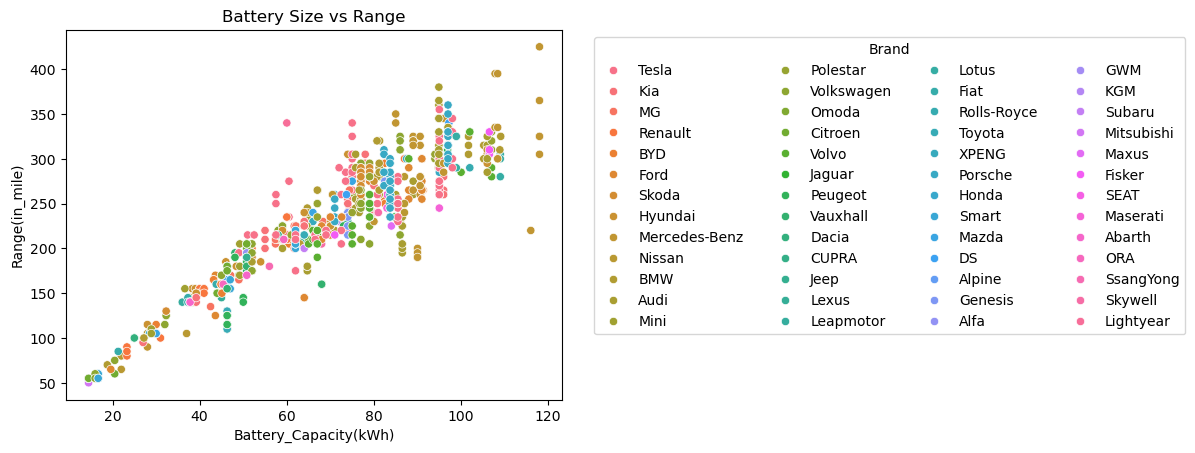

In [22]:
sns.scatterplot(data=df, x='Battery_Capacity(kWh)', y='Range(in_mile)', hue='Brand',legend='full')
plt.legend(
    bbox_to_anchor=(1.05, 1),    # Move outside plot
    loc='upper left',
    ncol=4,                      # 🔸 Split into 2 columns
    title="Brand"
)
plt.title('Battery Size vs Range')
plt.show()

## Boot Space Distribution

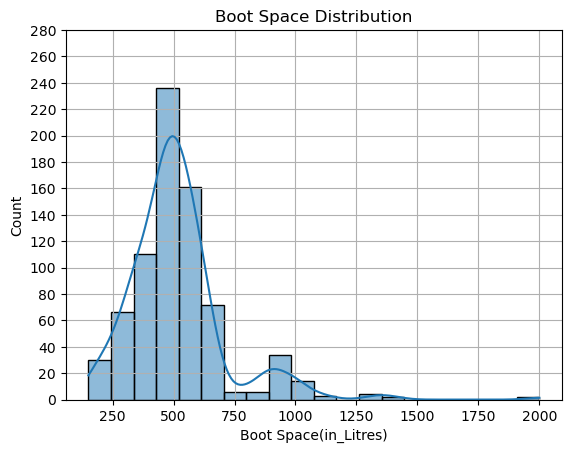

In [30]:
sns.histplot(df['Boot Space(in_Litres)'], bins=20, kde=True,)
plt.title('Boot Space Distribution')
plt.yticks(range(0,300,20))
plt.grid()
plt.show()

# Top 10 Brands by Number of Models

In [33]:
top_brands = df['Brand'].value_counts().head(10)
top_brands


Brand
Tesla            70
Audi             55
Porsche          52
Volkswagen       51
Mercedes-Benz    50
Volvo            37
BMW              34
Ford             34
Kia              28
Hyundai          27
Name: count, dtype: int64

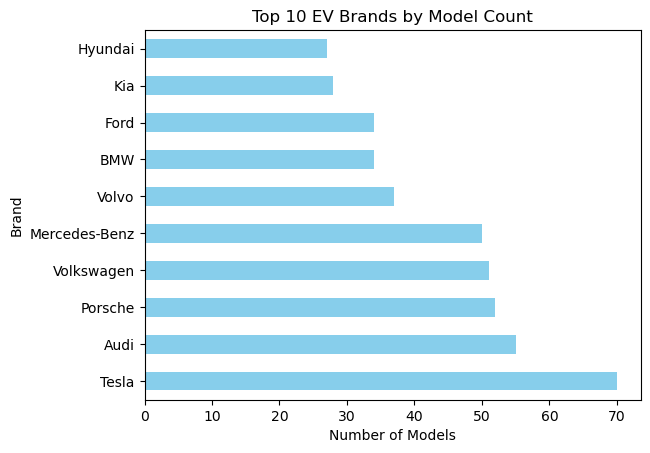

In [35]:
top_brands.plot(kind='barh', color='skyblue')
plt.title('Top 10 EV Brands by Model Count')
plt.xlabel('Number of Models')
plt.show()

# Price per Range Distribution

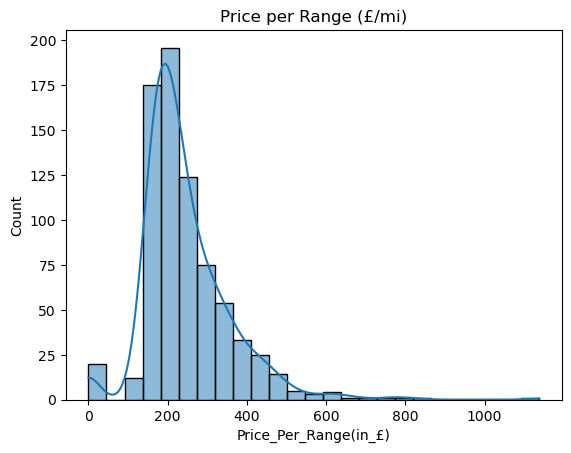

In [38]:
sns.histplot(df['Price_Per_Range(in_£)'], bins=25, kde=True)
plt.title('Price per Range (£/mi)')
plt.show()


# Acceleration vs Price

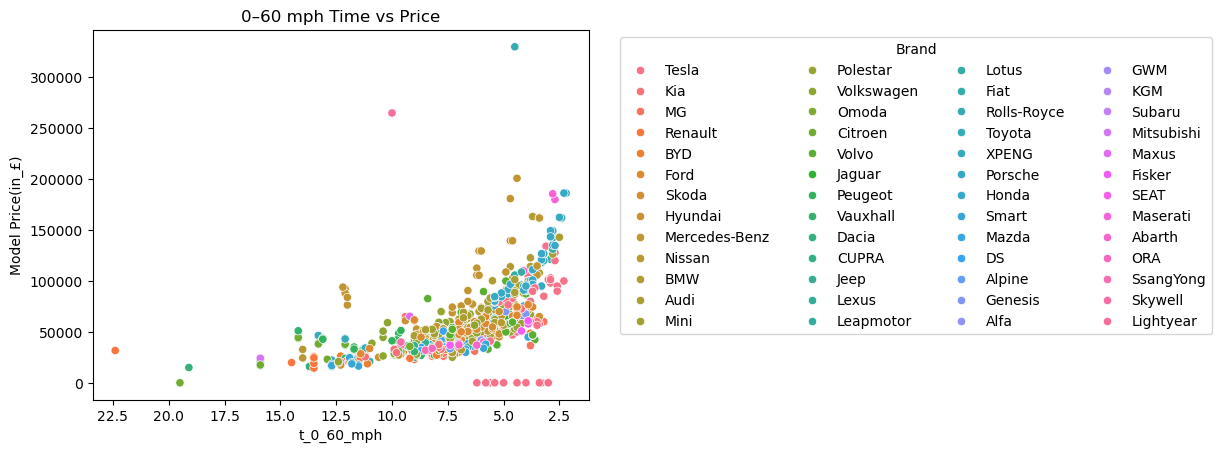

In [47]:
sns.scatterplot(data=df, x='t_0_60_mph', y='Model Price(in_£)', hue='Brand')
plt.title('0–60 mph Time vs Price')
plt.legend(
    bbox_to_anchor=(1.05, 1),    
    loc='upper left',
    ncol=4,                      
    title="Brand"
)
plt.gca().invert_xaxis()  # Because faster cars have lower times
plt.show()

#  Seating Capacity Count

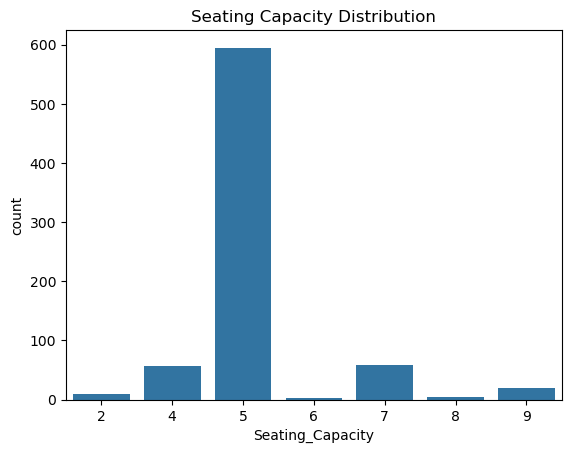

In [50]:
sns.countplot(x='Seating_Capacity', data=df)
plt.title('Seating Capacity Distribution')
plt.show()

# Efficiency by Weight

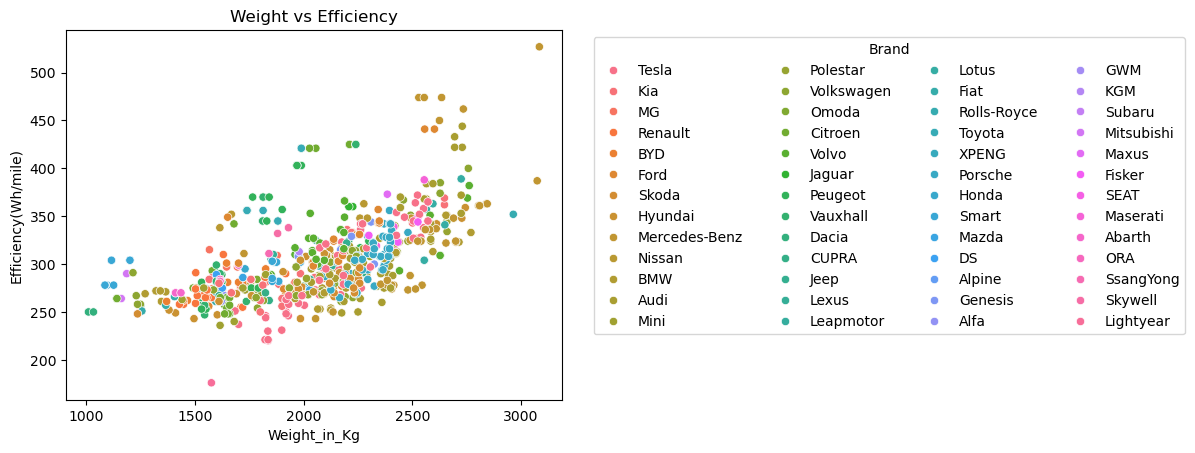

In [55]:
sns.scatterplot(data=df, x='Weight_in_Kg', y='Efficiency(Wh/mile)', hue='Brand')
plt.title('Weight vs Efficiency')
plt.legend(
    bbox_to_anchor=(1.05, 1),    
    loc='upper left',
    ncol=4,                      
    title="Brand"
)
plt.show()

# Price vs Range

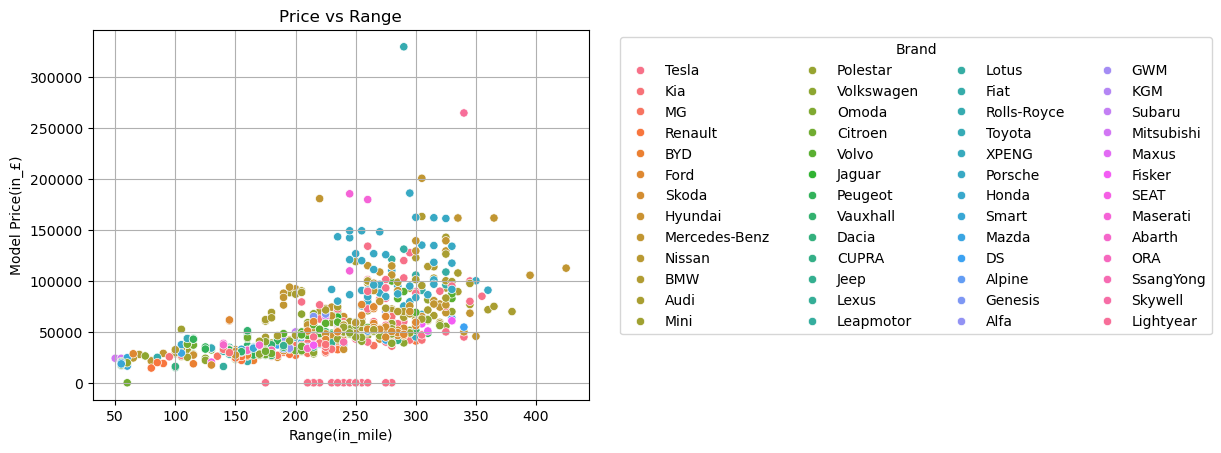

In [60]:
sns.scatterplot(data=df, x='Range(in_mile)', y='Model Price(in_£)', hue='Brand')
plt.legend(
    bbox_to_anchor=(1.05, 1),    
    loc='upper left',
    ncol=4,                      
    title="Brand"
)
plt.grid()
plt.title('Price vs Range')
plt.show()
